In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt

import invisible_cities.database.load_db as db

import sqlite3
from glob import glob

In [2]:
det_name = "flex.s1.3mmp15mm"

In [3]:
def load_detector_config(det_name):
    config_fname = f"config/{det_name}.config"

    with open(config_fname) as config_file:
        det_config = json.load(config_file)
    
    # Getting sensors info
    sensor_labels = det_config["SensorLabels"]
    for label in sensor_labels:
        det_config[label] = []
    
    sensors_fname = det_config["SensorFile"]
    with open(f"config/{sensors_fname}", 'r') as sensors_file:
        for entry in sensors_file.read().splitlines():
            words = entry.split()
            
            if (len(words) and (words[0] in sensor_labels)):
                sensor_id = int(words[1])
                pos = words[2][1:-1].split(',')
                sensor_x = float(pos[0])
                sensor_y = float(pos[1])
                det_config[words[0]].append((sensor_id, sensor_x, sensor_y))

    return det_config

In [4]:
config = load_detector_config(det_name)

In [5]:
config.keys()

dict_keys(['MinRun', 'MaxRun', 'XMIN', 'XMAX', 'YMIN', 'YMAX', 'ZMIN', 'ZMAX', 'RMAX', 'SensorFile', 'SensorLabels', 'PMT_Type', 'TP_SiPM_Type', 'PMT_Centroid', 'PMT_ErrorCentroid', 'PMT_Sigma', 'PMT_ErrorSigma', 'TP_SiPM_Centroid', 'TP_SiPM_ErrorCentroid', 'TP_SiPM_Sigma', 'TP_SiPM_ErrorSigma', 'TP_SiPM_BaseLine', 'TP_SiPM_NoiseDB', 'PMT', 'TP_SiPM'])

In [6]:
config['TP_SiPM_NoiseDB']

['new', 6500]

In [7]:
table = "SipmNoisePDF"
tPath = "./templates"

# Getting header
header_fname = f"{tPath}/{table}.h"
with open(header_fname, 'r') as header_file:
    header = header_file.read() + "\n"

In [8]:
header

'DROP TABLE IF EXISTS `SipmNoisePDF`;\nCREATE TABLE `SipmNoisePDF` (\n  `MinRun` int(11) NOT NULL,\n  `MaxRun` int(11) DEFAULT NULL,\n  `SensorID` int(11) NOT NULL,\n  `BinEnergyPes` float NOT NULL,\n  `Probability` float NOT NULL\n);\n\n'

In [9]:
noiseDB = config["TP_SiPM_NoiseDB"]
print(noiseDB)
noise_DB = db.SiPMNoise(noiseDB[0], noiseDB[1])

['new', 6500]


In [10]:
noise_DB

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-9.95, -9.85, -9.75, -9.65, -9.55, -9.45, -9.35, -9.25, -9.15,
        -9.05, -8.95, -8.85, -8.75, -8.65, -8.55, -8.45, -8.35, -8.25,
        -8.15, -8.05, -7.95, -7.85, -7.75, -7.65, -7.55, -7.45, -7.35,
        -7.25, -7.15, -7.05, -6.95, -6.85, -6.75, -6.65, -6.55, -6.45,
        -6.35, -6.25, -6.15, -6.05, -5.95, -5.85, -5.75, -5.65, -5.55,
        -5.45, -5.35, -5.25, -5.15, -5.05, -4.95, -4.85, -4.75, -4.65,
        -4.55, -4.45, -4.35, -4.25, -4.15, -4.05, -3.95, -3.85, -3.75,
        -3.65, -3.55, -3.45, -3.35, -3.25, -3.15, -3.05, -2.95, -2.85,
        -2.75, -2.65, -2.55, -2.45, -2.35, -2.25, -2.15, -2.05, -1.95,
        -1.85, -1.75, -1.65, -1.55, -1.45, -1.35, -1.25, -1.15, -1.05,
        -0.95, -0.85, -0.75, -0.65, -0.55

In [11]:
np.shape(noise_DB[2])

(1792,)

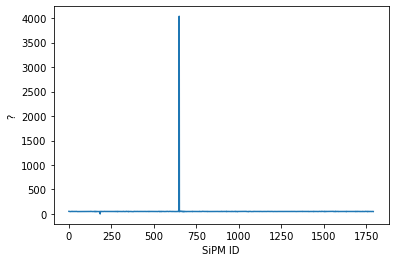

In [12]:
plt.plot(noise_DB[2]) #[300:500])
plt.xlabel('SiPM ID')
plt.ylabel('?')
plt.show()

In [13]:
print(noise_DB[2])

[52.2278 50.6986 51.3076 ... 49.9998 49.     48.9972]


In [14]:
sipm_data    = db.DataSiPM(noiseDB[0], noiseDB[1])

In [15]:
sipm_data[sipm_data.SensorID==1000] #.SensorID)

,SensorID,ChannelID,Active,X,Y,adc_to_pes,Sigma
0,1000,1013,1,-235.0,45.0,16.1908,1.67064


In [16]:
probs, xbins, baselines = db.SiPMNoise(noiseDB[0], noiseDB[1])

In [17]:
np.shape(xbins)

(399,)

In [18]:
noiseDB

['new', 6500]

In [19]:
np.shape(probs)

(1792, 399)

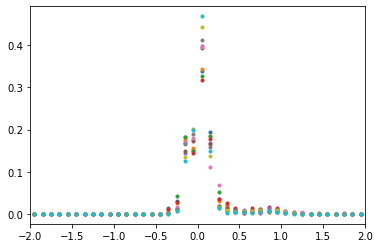

In [20]:
for i in range(0,10):
    plt.plot(xbins, probs[i], '.')
    plt.xlim(-2,2)
plt.show()

In [21]:
probs, xbins, baselines = db.SiPMNoise('new', 7894)

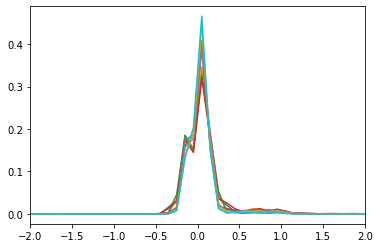

In [22]:
for i in range(0,10):
    plt.plot(xbins, probs[i])
    plt.xlim(-2,2)
plt.show()

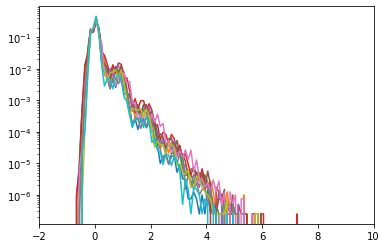

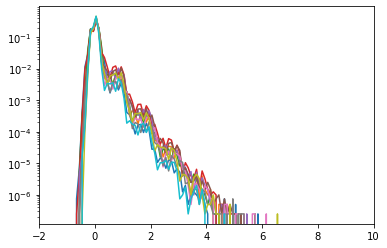

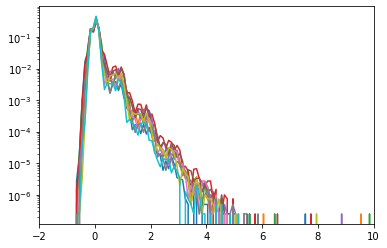

In [23]:
runs = [6500, 7000, 8088]
for run in runs:
    probs, xbins, baselines = db.SiPMNoise('new', run)
    for i in range(0,10):
        plt.plot(xbins, probs[i])
        plt.xlim(-2, 10)
    plt.yscale('log')
    plt.show()

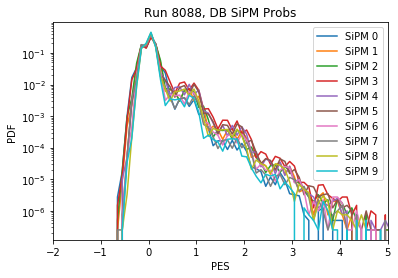

In [24]:
run = 8088
nsipms = 10
probs, xbins, baselines = db.SiPMNoise('new', run)
for i in range(0,nsipms):
    plt.plot(xbins, probs[i], label='SiPM '+str(i))
plt.xlim(-2, 5)
plt.xlabel('PES')
plt.ylabel('PDF')
plt.title('Run '+str(run)+', DB SiPM Probs')
plt.legend()
plt.yscale('log')
plt.show()

In [25]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

SiPM 0
[100 107]
peak  0
match
[100 107]


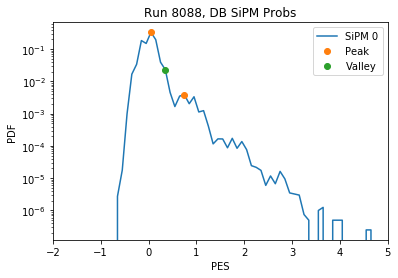

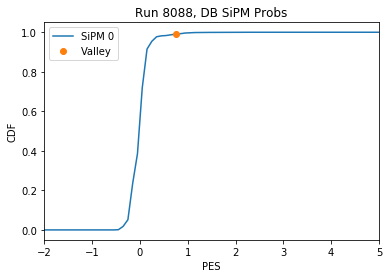

Threshold = 1 -> CDF = 0.9907152499999999
SiPM 673
[ 95 100 108 117]
peak  0
peak  1
match
[100 108 117]


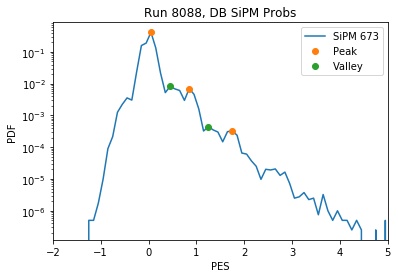

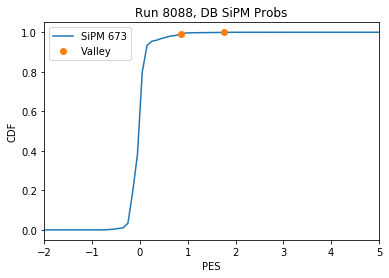

Threshold = 1 -> CDF = 0.9910005999999999
Threshold = 2 -> CDF = 0.9994428499999997
SiPM 400
[100 107 117]
peak  0
match
[100 107 117]


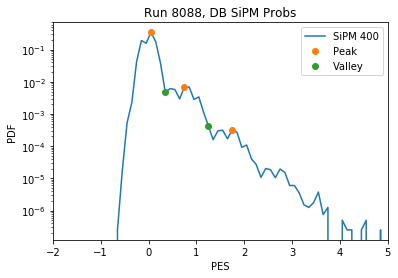

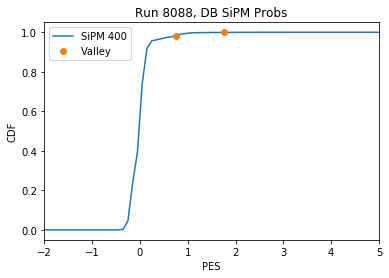

Threshold = 1 -> CDF = 0.9834309999999998
Threshold = 2 -> CDF = 0.9993412499999997


In [49]:
nsipms = [0, 673, 400] #3
for n in nsipms:
    print('SiPM '+str(n))
    peaks_ind, _ = find_peaks(probs[n], height=None, threshold=None, distance=5, prominence=1e-4, width=None, wlen=None, rel_height=0.5, plateau_size=None)

    # Check that max of spectra is same as first peak
    max_ind = np.argmax(probs[n])
    for peak in range(len(peaks_ind)):
        print('peak ', peak)
        if max_ind == peaks_ind[peak]:
            peaks_ind = peaks_ind[peak:]
            break
    
    peaks_x = xbins[peaks_ind]
    peaks = probs[n][peaks_ind]
    valleys_ind = peaks_ind[:-1] + np.diff(peaks_ind)//2
    valleys_x = xbins[valleys_ind]
    valleys = probs[n][valleys_ind]

    
    plt.plot(xbins, probs[n], label='SiPM '+str(n))
    plt.plot(peaks_x, peaks, 'o', label='Peak')
    plt.plot(valleys_x, valleys, 'o', label='Valley')
    plt.xlim(-2, 5)
    plt.xlabel('PES')
    plt.ylabel('PDF')
    plt.title('Run '+str(run)+', DB SiPM Probs')
    plt.legend()
    plt.yscale('log')
    plt.show()
    
    cdf = np.cumsum(probs[n])
    plt.plot(xbins, cdf, label='SiPM '+str(n))
    plt.plot(xbins[peaks_ind[1:]], cdf[peaks_ind[1:]], 'o', label='Valley')
    plt.xlim(-2, 5)
    plt.xlabel('PES')
    plt.ylabel('CDF')
    plt.title('Run '+str(run)+', DB SiPM Probs')
    plt.legend()
    #plt.yscale('log')
    plt.show()
    
    [print('Threshold = '+str(i+1)+' -> CDF = '+str(cdf[peaks_ind[i+1]])) for i in range(len(peaks_ind[1:]))]
    

In [30]:
mean_probs = np.mean(probs, axis=0)
sum_probs = np.sum(probs, axis=0)

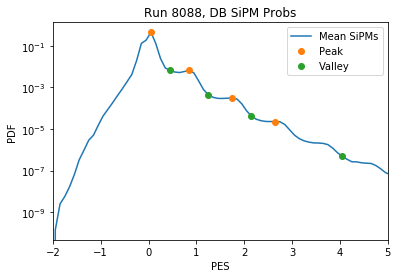

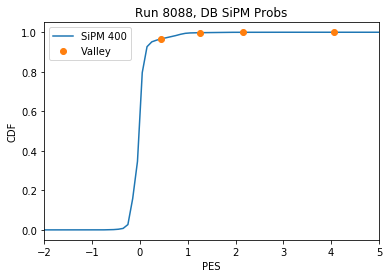

Threshold = 1 -> CDF = 0.9895979328487363
Threshold = 2 -> CDF = 0.9992492119851204
Threshold = 3 -> CDF = 0.9999258678214487
Threshold = 4 -> CDF = 0.9999994332516152
Threshold = 5 -> CDF = 0.999999649490455
Threshold = 6 -> CDF = 0.9999996859022854
Threshold = 7 -> CDF = 0.9999997383576424
Threshold = 8 -> CDF = 0.9999997771411246
Threshold = 9 -> CDF = 0.9999998058799638
Threshold = 10 -> CDF = 0.9999998206679103
Threshold = 11 -> CDF = 0.9999998521969283
Threshold = 12 -> CDF = 0.9999998831679103
Threshold = 13 -> CDF = 0.9999998972583126
Threshold = 14 -> CDF = 0.9999999035362143
Threshold = 15 -> CDF = 0.9999999379949194
Threshold = 16 -> CDF = 0.999999952085321
Threshold = 17 -> CDF = 0.9999999561310798
Threshold = 18 -> CDF = 0.999999967570812


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [32]:
peaks_ind, _ = find_peaks(mean_probs, height=None, threshold=None, distance=3, prominence=1e-9, width=None, wlen=None, rel_height=0.5, plateau_size=None)
peaks_x = xbins[peaks_ind]
peaks = mean_probs[peaks_ind]
valleys_ind = peaks_ind[:-1] + np.diff(peaks_ind)//2
valleys_x = xbins[valleys_ind]
valleys = mean_probs[valleys_ind]

plt.plot(xbins, mean_probs, label='Mean SiPMs')
plt.plot(peaks_x, peaks, 'o', label='Peak')
plt.plot(valleys_x, valleys, 'o', label='Valley')
plt.xlim(-2, 5)
plt.xlabel('PES')
plt.ylabel('PDF')
plt.title('Run '+str(run)+', DB SiPM Probs')
plt.legend()
plt.yscale('log')
plt.show()

cdf = np.cumsum(mean_probs)
plt.plot(xbins, cdf, label='SiPM '+str(n))
plt.plot(xbins[valleys_ind], cdf[valleys_ind], 'o', label='Valley')
plt.xlim(-2, 5)
plt.xlabel('PES')
plt.ylabel('CDF')
plt.title('Run '+str(run)+', DB SiPM Probs')
plt.legend()
#plt.yscale('log')
plt.show()

[print('Threshold = '+str(i+1)+' -> CDF = '+str(cdf[peaks_ind[i+1]])) for i in range(len(peaks_ind[1:]))]


In [54]:
np.shape(probs)

(1792, 399)

In [55]:
cdf = np.cumsum(probs, axis=1)

In [69]:
# Get first valley for every sipm
valleys_cdf = []
nsipms = 1792
cdf = np.cumsum(probs, axis=1)
for n in range(nsipms):
    
    if n%100 == 0:
        print('SiPM '+str(n))
    
    # Find peaks
    peaks_ind, _ = find_peaks(probs[n], height=None, threshold=None, distance=5, prominence=1e-5, width=None, wlen=None, rel_height=0.5, plateau_size=None)
    
    # Check that max of spectra is same as first peak
    max_ind = np.argmax(probs[n])
    for peak in range(len(peaks_ind)):
        if max_ind == peaks_ind[peak]:
            peaks_ind = peaks_ind[peak:]
            break
    if len(peaks_ind) < 2:
        continue
    
    # Grab Valley position
    valleys_ind = peaks_ind[:-1] + np.diff(peaks_ind)//2
    
    valleys_cdf.append(cdf[n][valleys_ind[0]])

SiPM 0
SiPM 100
SiPM 200
SiPM 300
SiPM 400
SiPM 500
SiPM 600
SiPM 700
SiPM 800
SiPM 900
SiPM 1000
SiPM 1100
SiPM 1200
SiPM 1300
SiPM 1400
SiPM 1500
SiPM 1600
SiPM 1700


In [64]:
valleys_cdf

[0.9771825, 0.9646622, 0.9644925]

In [70]:
np.shape(valleys_cdf)

(1785,)

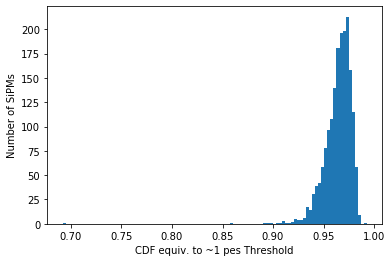

In [75]:
plt.hist(valleys_cdf, bins=100)
plt.xlabel('CDF equiv. to ~1 pes Threshold')
plt.ylabel('Number of SiPMs')
plt.show()

In [78]:
cdf_hist, cdf_bin_edges = np.histogram(valleys_cdf, bins=100)

In [83]:
(cdf_bin_edges[np.argmax(cdf_hist)] + cdf_bin_edges[np.argmax(cdf_hist)+1]) / 2.

0.9733372702499999